In [1]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
import time
import sys
sys.path.insert(0, '../code/')
from k_armed_bandit import KArmedBandit

%matplotlib inline 
%load_ext autoreload
%autoreload 2

n_jobs=20

# Exercise 2.5

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.

In [2]:
verbose=0
alpha="1/n"
epsilons=[0.1]
runs=2000
epochs=10000
k_arms=10
init_deterministic=True
increment_mu=0
increment_sigma=0.01
def run(k_arms, runs, epochs, alpha, epsilons, init_deterministic, 
        increment_mu, increment_sigma, n_jobs=4, verbose=1):
    
    results = {}
    for i, epsilon in enumerate(epsilons):
        list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
            delayed(KArmedBandit(k_arms=k_arms, 
                                 alpha=alpha,
                                 epsilon=epsilon,
                                 prior_estimation=0., 
                                 true_reward=0.,
                                 init_deterministic=init_deterministic,
                                 increment_mu=increment_mu,
                                 increment_sigma=increment_sigma).simulate)(epochs=epochs)
            for _ in range(runs))
        #compute avg rewards
        results[epsilon] = np.array(list_of_runs)
    return results

results =  run(k_arms=k_arms, runs=runs, epochs=epochs, alpha=alpha, epsilons=epsilons, 
               init_deterministic=init_deterministic, increment_mu=increment_mu, 
               increment_sigma=increment_sigma, n_jobs=n_jobs, verbose=verbose)

### Run experiments using sample averaging

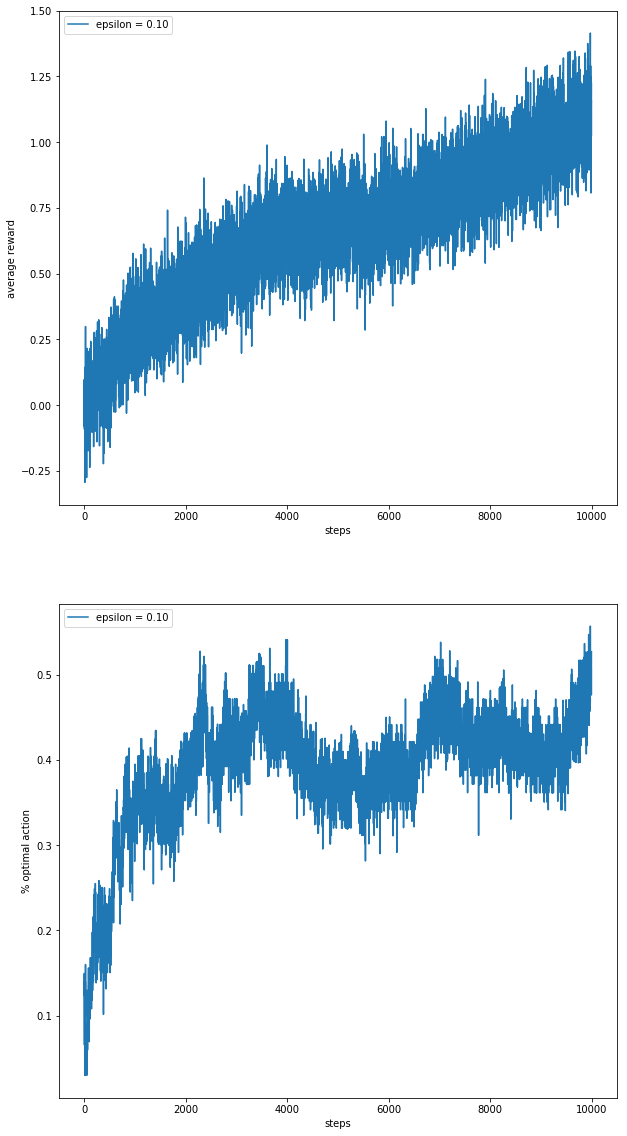

In [3]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
for epsilon in epsilons:
    rewards = results.get(epsilon)[:,:,0].mean(axis=0)
    plt.plot(rewards, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for epsilon in epsilons:
    best_action_counts = results.get(epsilon)[:,:,1].mean(axis=0)
    plt.plot(best_action_counts, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()

### Run experiments using constant step-size of 0.1

In [4]:
verbose=0
alpha=0.1
epsilons=[0.1]
runs=2000
epochs=10000
k_arms=10
init_deterministic=True
increment_mu=0
increment_sigma=0.01
def run(k_arms, runs, epochs, alpha, epsilons, init_deterministic, 
        increment_mu, increment_sigma, n_jobs=4, verbose=1):
    
    results = {}
    for i, epsilon in enumerate(epsilons):
        list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
            delayed(KArmedBandit(k_arms=k_arms, 
                                 alpha=alpha,
                                 epsilon=epsilon,
                                 prior_estimation=0., 
                                 true_reward=0.,
                                 init_deterministic=init_deterministic,
                                 increment_mu=increment_mu,
                                 increment_sigma=increment_sigma).simulate)(epochs=epochs)
            for _ in range(runs))
        #compute avg rewards
        results[epsilon] = np.array(list_of_runs)
    return results

results =  run(k_arms=k_arms, runs=runs, epochs=epochs, alpha=alpha, epsilons=epsilons, 
               init_deterministic=init_deterministic, increment_mu=increment_mu, 
               increment_sigma=increment_sigma, n_jobs=n_jobs, verbose=verbose)

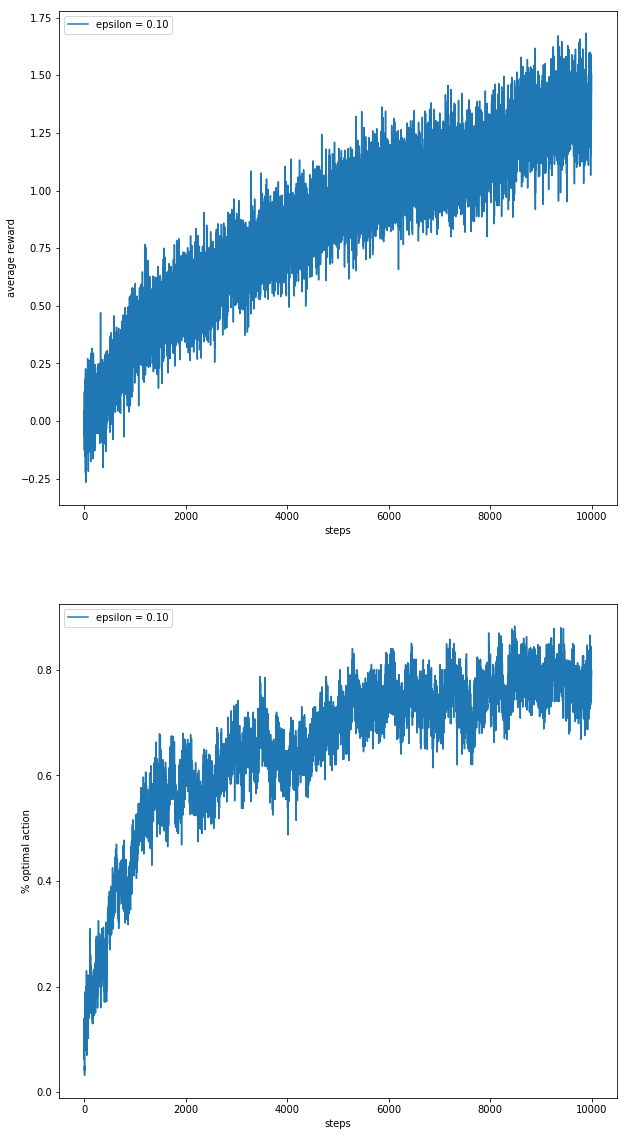

In [5]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
for epsilon in epsilons:
    rewards = results.get(epsilon)[:,:,0].mean(axis=0)
    plt.plot(rewards, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for epsilon in epsilons:
    best_action_counts = results.get(epsilon)[:,:,1].mean(axis=0)
    plt.plot(best_action_counts, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()

## Testing Optimistic Initial Values
Figure 2.3

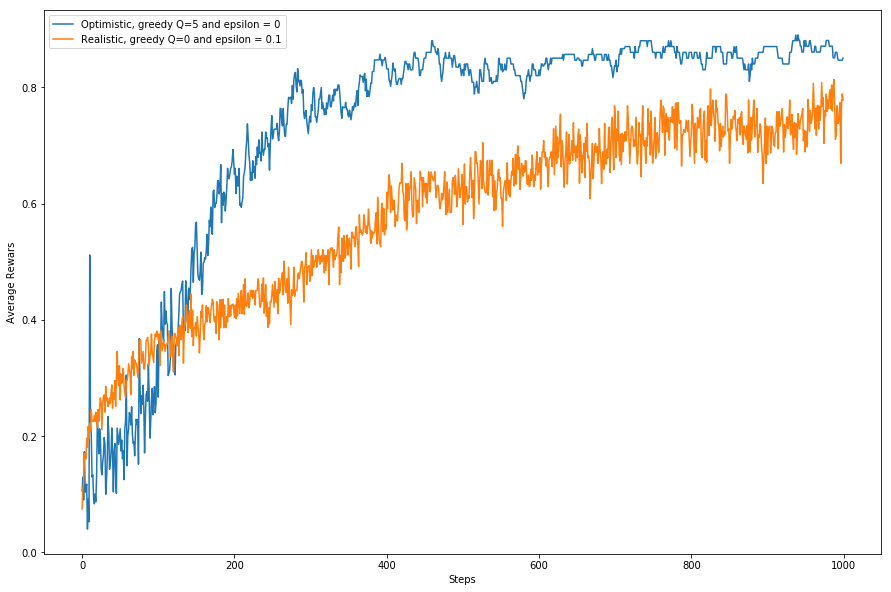

In [6]:
verbose=0
runs=2000
epochs=1000
k_arms=10

def run_bandit(bandit,epochs=10000,  runs=2000, n_jobs=4, verbose=1):
    list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(bandit.simulate)(epochs=epochs)
        for _ in range(runs))
    return np.array(list_of_runs)



b1= KArmedBandit(k_arms=k_arms, epsilon=0, alpha=0.1,  prior_estimation=5)
results_b1 =  run_bandit(bandit=b1, epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b2= KArmedBandit(k_arms=k_arms, epsilon=0.1, alpha=0.1, )
results_b2 =  run_bandit(bandit=b2,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

plt.figure(figsize=(15, 10))
plt.plot(results_b1[:,:,1].mean(axis=0), label='Optimistic, greedy Q=5 and epsilon = 0')
plt.plot(results_b2[:,:,1].mean(axis=0), label='Realistic, greedy Q=0 and epsilon = 0.1')

plt.xlabel('Steps')
plt.ylabel('Average Rewars')
plt.legend()


## TestingUpper-Confidence-Bound Action Selection
Figure 2.4

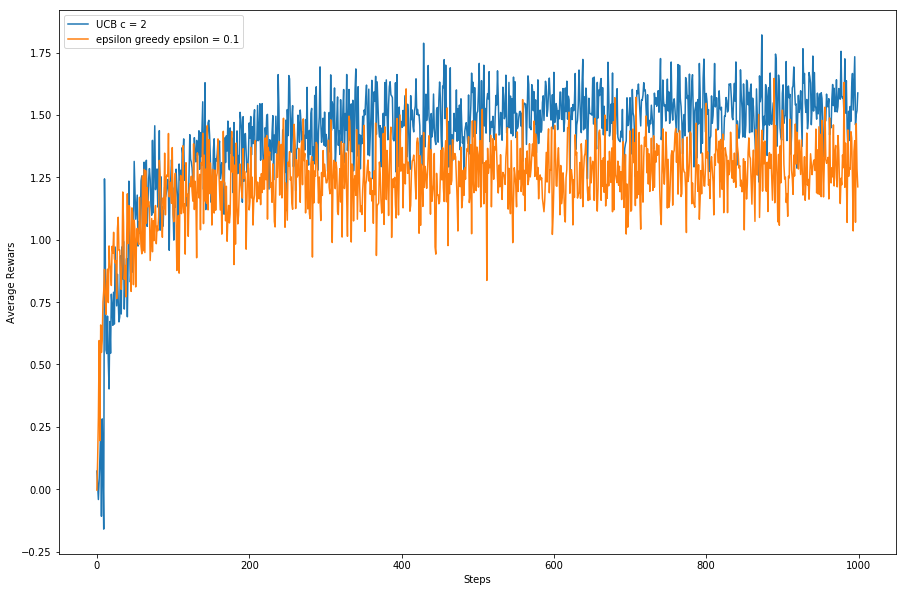

In [7]:
verbose=0
runs=2000
epochs=1000
k_arms=10

def run_bandit(bandit,epochs=10000,  runs=2000, n_jobs=4, verbose=1):
    
    list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(bandit.simulate)(epochs=epochs)
        for _ in range(runs))
    return np.array(list_of_runs)



b1= KArmedBandit(k_arms=k_arms, use_UBC=True, UBC_param=2,)
results_b1 =  run_bandit(bandit=b1, epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b2= KArmedBandit(k_arms=k_arms, epsilon=0.1)
results_b2 =  run_bandit(bandit=b2,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

plt.figure(figsize=(15, 10))
plt.plot(results_b1[:,:,0].mean(axis=0), label='UCB c = 2')
plt.plot(results_b2[:,:,0].mean(axis=0), label='epsilon greedy epsilon = 0.1')

plt.xlabel('Steps')
plt.ylabel('Average Rewars')
plt.legend()


## Testing Gradient Bandit Algorithms
Figure 2.5

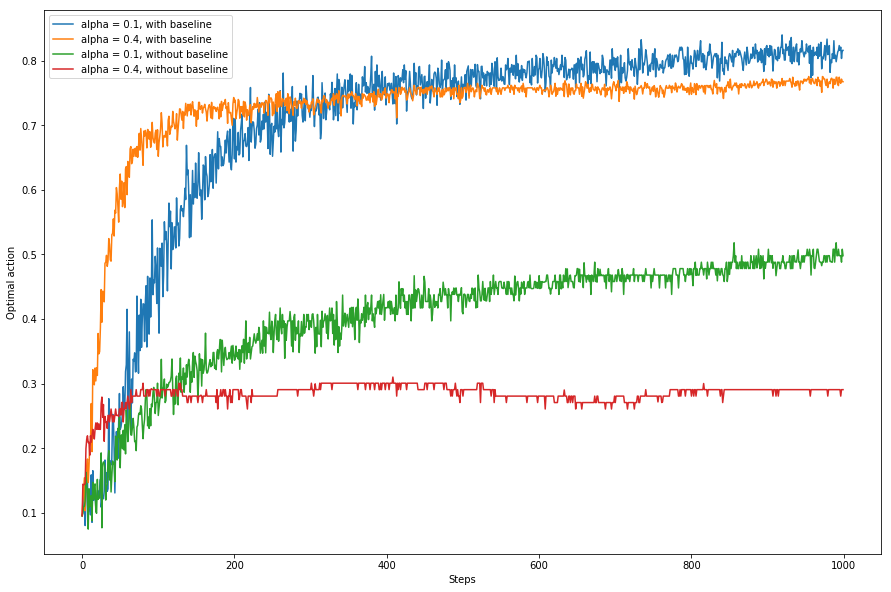

In [8]:
verbose=0
runs=2000
epochs=1000
k_arms=10

def run_bandit(bandit, epochs=10000,  runs=2000, n_jobs=4, verbose=1):
    
    list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(bandit.simulate)(epochs=epochs)
        for _ in range(runs))
    return np.array(list_of_runs)



b1= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=True, alpha=0.1,  true_reward=4)
results_b1 =  run_bandit(bandit=b1,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b2= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=True, alpha=0.4,  true_reward=4)
results_b2 =  run_bandit(bandit=b2,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b3= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=False, alpha=0.1,  true_reward=4)
results_b3 =  run_bandit(bandit=b3,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b4= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=False, alpha=0.4,  true_reward=4)
results_b4 =  run_bandit(bandit=b4,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)


plt.figure(figsize=(15, 10))
plt.plot(results_b1[:,:,1].mean(axis=0), label='alpha = 0.1, with baseline')
plt.plot(results_b2[:,:,1].mean(axis=0), label='alpha = 0.4, with baseline')
plt.plot(results_b3[:,:,1].mean(axis=0), label='alpha = 0.1, without baseline')
plt.plot(results_b4[:,:,1].mean(axis=0), label='alpha = 0.4, without baseline')

plt.xlabel('Steps')
plt.ylabel('Optimal action')
plt.legend()

### Figure 2.6

In [9]:
dict_fucntions_and_params = {
    'epsilon-greedy': {
        'params': [2 ** i for i in np.arange(-7, -1, dtype=np.float)],
        'call': lambda epsilon: KArmedBandit(k_arms=k_arms, epsilon=epsilon)
        },
    'UBC': {'params': [2 ** i for i in np.arange(-4, 2, dtype=np.float)],
            'call': lambda UBC_param: KArmedBandit(k_arms=k_arms, use_UBC=True, UBC_param=UBC_param,)
            },
    'gradient': {'params': [2 ** i for i in np.arange(-5, 2, dtype=np.float)],
                 'call': lambda alpha: KArmedBandit(k_arms=k_arms, use_gradient=True,
                                                      use_baseline_gradient=True, alpha=alpha, )
                 },
    'greedy-optimistic': {
        'params': [2 ** i for i in np.arange(-2, 3, dtype=np.float)],
        'call': lambda prior_estimation: KArmedBandit(k_arms=k_arms, epsilon=0, alpha=0.1, 
                                                      prior_estimation=prior_estimation)
        },
}

epsilon-greedy 0.0078125
epsilon-greedy 0.015625
epsilon-greedy 0.03125
epsilon-greedy 0.0625
epsilon-greedy 0.125
epsilon-greedy 0.25
UBC 0.0625
UBC 0.125
UBC 0.25
UBC 0.5
UBC 1.0
UBC 2.0
gradient 0.03125
gradient 0.0625
gradient 0.125
gradient 0.25
gradient 0.5
gradient 1.0
gradient 2.0
greedy-optimistic 0.25
greedy-optimistic 0.5
greedy-optimistic 1.0
greedy-optimistic 2.0
greedy-optimistic 4.0


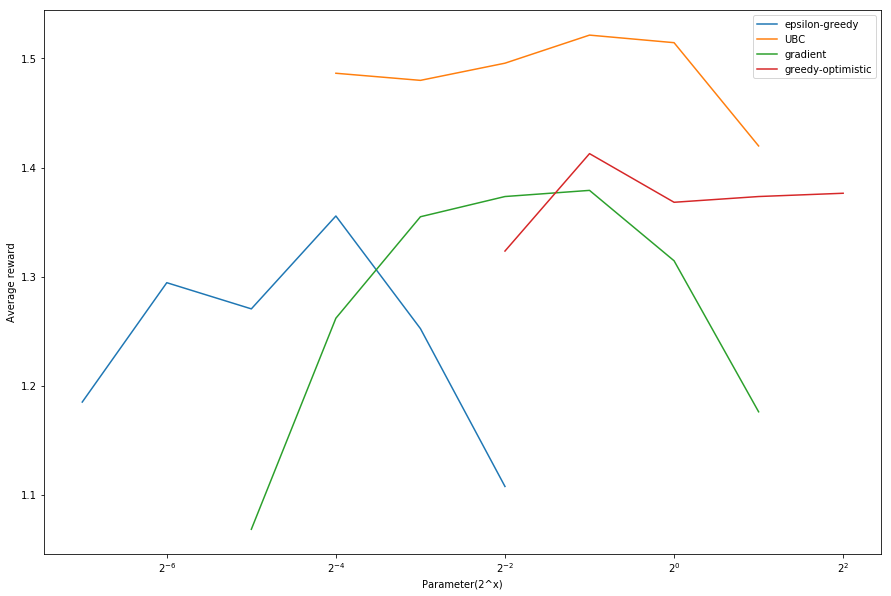

In [10]:
verbose=0
runs=2000
epochs=1000
k_arms=10
mean_last=100000

def run_bandit(bandit, epochs=10000,  runs=2000, n_jobs=4, verbose=1):
    
    list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(bandit.simulate)(epochs=epochs)
        for _ in range(runs))
    return np.array(list_of_runs)

all_result = {}
plt.figure(figsize=(15, 10))
for label, function in dict_fucntions_and_params.items():
    bandits = []
    for param in function['params']:
        print(label,param)
        b1 = function['call'](param)
        result = run_bandit(bandit=b1,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)
        all_result.update({label+'_'+str(param):result})
        bandits.append(result[:,:,0].mean(axis=0)[-mean_last:].mean())
    plt.plot(function['params'], bandits, label=label )
        
plt.xlabel('Parameter(2^x)')
plt.ylabel('Average reward')
plt.xscale('log', basex=2)
plt.legend()

# Exercise 2.11

Make a figure analogous to Figure 2.6 for the nonstationary case outlined in Exercise 2.5.
Include the constant-step-size $\epsilon$-greedy algorithm with $\alpha = 0.1$. Use runs of 200,000 steps and, as a 
performance measure for each algorithm and parameter setting, use the average reward over the last 100,000 steps.

In [2]:
import pickle

In [ ]:
verbose=0
runs=2000
epochs=100000
k_arms=10
mean_last=50000
increment_mu=0
increment_sigma=0.01

dict_fucntions_and_params = {
    'epsilon-greedy': {
        'params': [2 ** i for i in np.arange(-7, -1, dtype=np.float)],
        'call': lambda epsilon: KArmedBandit(k_arms=k_arms, epsilon=epsilon,
                                             increment_mu=increment_mu, increment_sigma=increment_sigma )
        },
    'UBC': {'params': [2 ** i for i in np.arange(-4, 2, dtype=np.float)],
            'call': lambda UBC_param: KArmedBandit(k_arms=k_arms, use_UBC=True, UBC_param=UBC_param,
                                                   increment_mu=increment_mu, increment_sigma=increment_sigma)
            },
    'gradient': {'params': [2 ** i for i in np.arange(-5, 2, dtype=np.float)],
                 'call': lambda alpha: KArmedBandit(k_arms=k_arms, use_gradient=True,
                                                      use_baseline_gradient=True, alpha=alpha,
                                                    increment_mu=increment_mu, increment_sigma=increment_sigma )
                 },
    'greedy-optimistic': {
        'params': [2 ** i for i in np.arange(-2, 3, dtype=np.float)],
        'call': lambda prior_estimation: KArmedBandit(k_arms=k_arms, epsilon=0, alpha=0.1, 
                                                      prior_estimation=prior_estimation,
                                                      increment_mu=increment_mu, increment_sigma=increment_sigma)
        },
    'epsilon-greedy-constant': {
        'params': [2 ** i for i in np.arange(-7, -1, dtype=np.float)],
        'call': lambda epsilon: KArmedBandit(k_arms=k_arms, epsilon=epsilon, alpha=0.1, 
                                             increment_mu=increment_mu, increment_sigma=increment_sigma )
        },
}

def run_bandit(bandit, epochs=10000,  runs=2000, n_jobs=4, verbose=1):
    
    list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(bandit.simulate)(epochs=epochs)
        for _ in range(runs))
    return np.array(list_of_runs)

all_result = {}
plt.figure(figsize=(15, 10))
for label, function in dict_fucntions_and_params.items():
    bandits = []
    for param in function['params']:
        print(label,param)
        b1 = function['call'](param)
        start = time.time()
        result = run_bandit(bandit=b1,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)
        end = time.time()
        print('time: ' ,end - start)
        all_result.update({label+'_'+str(param):
                           result[:,:,0].mean(axis=0)[-mean_last:].mean()})
        res = result[:,:,0].mean(axis=0)[-mean_last:].mean()
        bandits.append(res)
    

    with open(label+'.pickle', 'wb') as handle:
        pickle.dump(bandits, handle, protocol=pickle.HIGHEST_PROTOCOL)
    plt.plot(function['params'], bandits, label=label )
        
plt.xlabel('Parameter(2^x)')
plt.ylabel('Average reward')
plt.xscale('log', basex=2)
plt.legend()

plt.savefig('exercise_2-11.png')